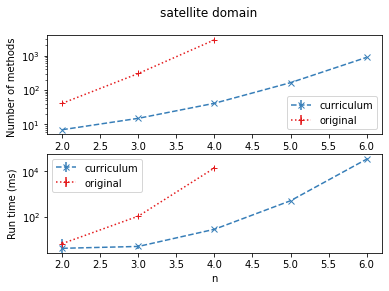

In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import statistics
import random
import os
import argparse

def plot(domain):
    dir = "./ICAPS23_experiments_"
    # dir = "/home/rli12314/SHELL/ICAPS23EXP/ICAPS23_experiments_"
    domains = ['logistics']
    modes = ['curriculum', 'original']
    prune = [True, False]
    prune = [False]
    plot = ['run_time', 'number_of_methods']
    prec = [True] if domain == 'logistics' else [False]
    fig, axs = plt.subplots(2)
    #     axs[0].errorbar([2,3], [5,6], yerr=[0,0], 
    #         color = 'green',
    #         # linewidth = '1.0' if is_prune else '1.5',
    #         label="{}{}{}".format('minimum manual', ', pruning', ', prec'),
    #         ls='-')
    for has_prec in prec:
        for mode in modes:
            for is_prune in prune:
                results = {}
                for size in range(2,26):
                    for count in range(50):
                        try:
                            with open(dir + domain + "/results/methods/{}_{}{}{}_{}_{}.txt".format(
                                domain, 
                                mode, 
                                '_prune' if is_prune else '', 
                                '_prec' if has_prec else '',
                                size,
                                count
                                ), 'r') as file:
                                first_line = file.readline()
#                                 print(size, count, has_prec, mode, is_prune, size, count, first_line)
                                row = first_line.rstrip().split(',')
                                if int(row[0]) not in results:
                                    results[int(row[0])] = [[int(row[2])], [float(row[3])]]
                                else:
                                    results[int(row[0])][0].append(int(row[2]))
                                    results[int(row[0])][1].append(float(row[3]))
                        except IOError:
#                             print("Warning: File does not appear to exist.")
                            pass
                x = list(results.keys())
                y_number_of_methods = [ statistics.mean(results[i][0]) for i in x]
                e_number_of_methods = [ statistics.pstdev(results[i][0]) for i in x]
                y_runtime = [ statistics.mean(results[i][1]) for i in x]
                e_runtime = [ statistics.pstdev(results[i][1]) for i in x]
                # print(x)
                # print(y_number_of_methods)
                # print(e_number_of_methods)
                # print(y_runtime)
                # print(e_runtime)
                # y_number_of_methods = [0 for i in y_number_of_methods]
                axs[0].errorbar(x, y_number_of_methods, yerr=e_number_of_methods, 
                    color = '#377eb8' if mode == 'curriculum' else '#e41a1c',
                    # linewidth = '1.0' if is_prune else '1.5',
                    label="{}{}{}".format(mode, ', pruned' if is_prune else '', ', prec' if has_prec else ''),
                    ls='--' if mode == 'curriculum' else ':' ,
                    marker = 'x' if mode == 'curriculum' else '+',
                    )
                axs[1].errorbar(x, y_runtime, yerr=e_runtime, 
                    color = '#377eb8' if mode == 'curriculum' else '#e41a1c',
                    # linewidth = '1.0' if is_prune else '1.5',
                    label="{}{}{}".format(mode, ', pruned' if is_prune else '', ', prec' if has_prec else ''),
                    ls='--' if mode == 'curriculum' else ':' ,
                    marker = 'x' if mode == 'curriculum' else '+',
                    )

    fig.suptitle('{} domain'.format(domain))
    axs[0].legend()
    axs[0].set_ylabel('Number of methods ')
    axs[1].legend()
    axs[1].set_xlabel('n')
    axs[1].set_ylabel('Run time (ms)')
    axs[0].set_yscale('log')
    axs[1].set_yscale('log')
    # axs[0].set_ylim([0,100])

plot('satellite')
